# Big Mart Sales

## INTRODUCTION

#### Big Market is a big supermarket chain, with stores all around the country.The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. With the Information provided We'll make an EDA report to understand the properties of products and stores which play a key role in increasing sales and use the Information to take the correct measures which could help their business to grow.

### DATA DESCRIPTION

#### The dataset has 8523 entries with 12 columns. The description of each column is given below.

#### Item_Identifier:  Unique Product ID
#### Item_Weight   :  Weight Of Item
#### Item_Fat_Content: Whether the product is low fat or not
#### Item_Visibility :  The % of total display are of all products in a store allocated to a particular product
#### Item_Type :  The  category to which the product belongs
#### Item MRP  :  Maximum Retail Price(List Price) Of the Product
#### Outlet_Identifier :  Unique store ID
#### Outlet_Establishment_Year : The year in which the Store was established
#### Outlet_Size : The size of the store in terms Of Ground Area Covered
#### Outlet_Location_Type : The type of city in which store is located
#### Outlet_Type : Whether the outlet is just a grocery store or some sort  of supermarket
#### item_Outlet_Sales : Sales of the product in a particular store. This is the value of the outcome variable to be predicted.

Let us start importing the common libraries that will be used in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### General Overview Of the dataset
##### Now I will read Big Mart Sales dataset using Pandas read_csv method and explore first five rows of the dataset

In [2]:
### Reading the Big Mart Sales Dataset
df = pd.read_csv("F:\Big-Mart-Sales\Big_mart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
### Finding the number of rows and columns in the dataset
df.shape

(8523, 12)

### Let us see the summary of the dataset

In [4]:
#Summary of the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The above stats tells us a lot about the dataset. As we can see that , the maximum weight of a product is 21.35 ,
maximum MRP  is  266.88 , the highest establishment year of the outlet is 2009 and the maximum Item outlet sales is 13086.96.

Also we note that on average , the item weight is 12.85  , MRP is  141 and the Item outlet sales is 2181.28.

##### Let us assume that Columns like Item_Identifier, Outlet_Identifier, Outlet_Establishment_Year , Item_Visibility, make a least impact on Item_Outlet_Sales so we can remove these columns.

So now we have:-

In [5]:
df1 = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year', 'Item_Visibility'] , axis = 1)
df1.head(10)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,Snack Foods,57.6588,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,Snack Foods,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,Frozen Foods,96.9726,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,Frozen Foods,187.8214,NaN,Tier 2,Supermarket Type1,4710.5350


#### Cheking the Dataset quality

Let's find the missing values first

In [6]:
# Finding the missing value in the dataset

missing_value = df.isnull().sum(axis=0).reset_index()
missing_value.columns = ['column_name', 'missing_count']
missing_value = missing_value[missing_value['missing_count']>0]
missing_value

,column_name,missing_count
1,Item_Weight,1463
8,Outlet_Size,2410


As we can check that there are 1463 null values for Item_Weight and 2410 null values for Outlet_Size.

In [7]:
### Dropping all the values for Item_Weight and Outlet_Size doesn't make any sense
### So let us find the mode for both.

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0],inplace=True)

In [8]:
#Checking If any null values are left in our dataset or not
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Cool!!! They are no null values in the dataset now.

## UNIVARIATE ANALYSIS

Now we will be analyzing the distribution of the data and will try to find the inferences from different columns used in the dataset

#### Item_MRP

In [9]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

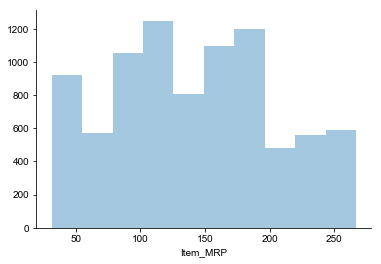

In [10]:
sns.distplot(df['Item_MRP'].dropna(), bins = 10, kde= False)
sns.set_style("dark",{'axes.grid' : True})
sns.despine()

From the above graph we can see that the minimum price of the item available in the store is around 20 and the maximum cost of the item is 270

#### Outlet_Location_Type

In [11]:
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

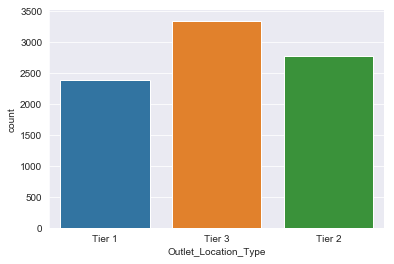

In [12]:
### Plotting the graph to find that in which loaction there are highest number of supermarkets. 
sns.countplot(df['Outlet_Location_Type'])
sns.set_style("whitegrid")
sns.despine()

We can clearly see that in **Tier 3** there are highest number of supermarkets.

#### Outlet_Size

In [13]:
df['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

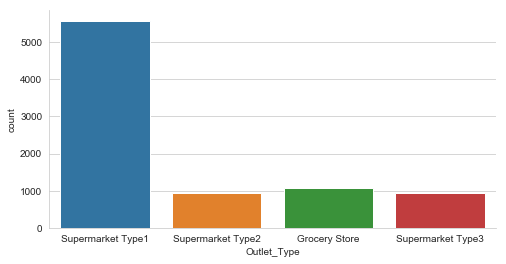

In [14]:
plt.subplots(figsize = (8,4))
sns.countplot(df['Outlet_Type'])
sns.despine()

We can observe that maximum number of outlets are **supermarket Type 1** and approximately there are equal number of **Supermarket Type2** and **Supermarket Type3**

#### Item_Fat_ Content

In [15]:
df['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

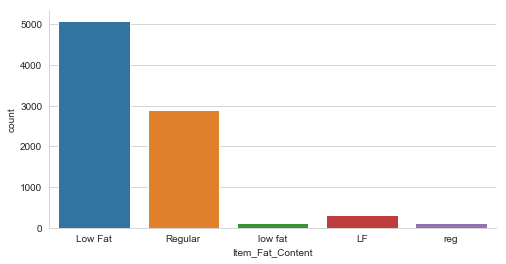

In [16]:
plt.subplots(figsize = (8,4))
sns.countplot(df['Item_Fat_Content'])
sns.despine()

There are mainly two categories under the **Item_Fat_Content** which includes Low Fat & Regular. But, some of ‘Low Fat’ values miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

So let us reduce the anomolies which is present in our data.


In [17]:
### Removing the anamolies present in our data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

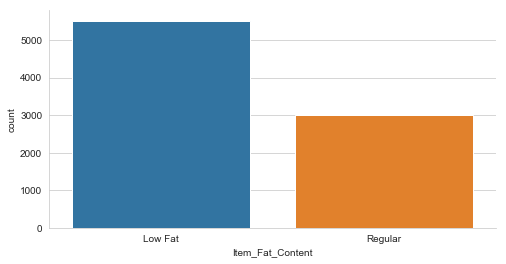

In [18]:
### Let us check the plot again now.

plt.subplots(figsize = (8,4))
sns.countplot(df['Item_Fat_Content'])
sns.despine()


Cool !!! Now **Item_Fat_Content** contains only two categories as 'Low Fat' and 'Regular'. We can find that there are more products with Low Fat than Regular

#### Item_Type

In [31]:
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

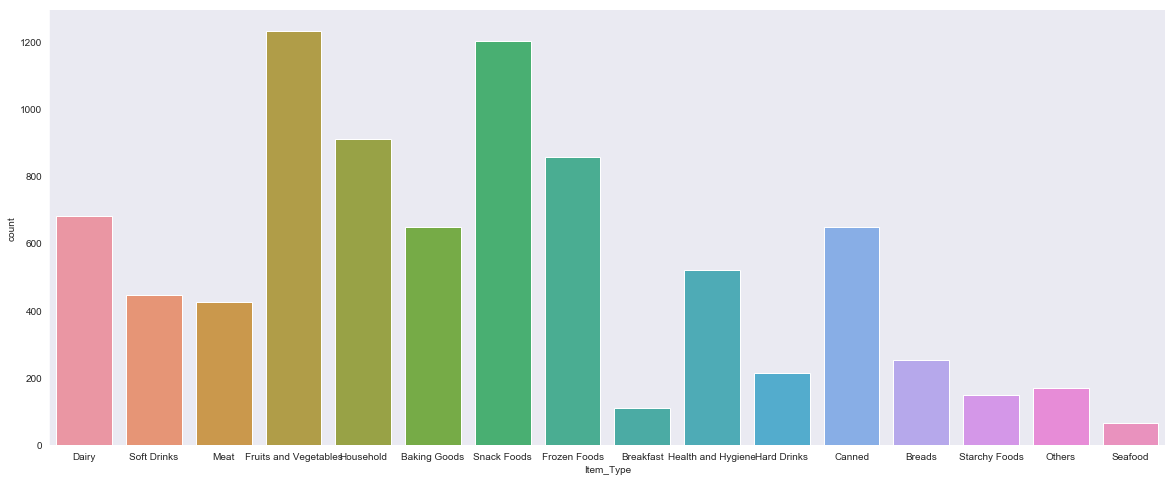

In [33]:
plt.figure(figsize=(20, 8))
sns.countplot(df['Item_Type'])
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()

The above plot tells us about the different types of Items which are available in the store.
We can see that Fruits & Vegetables, Snack Foods have highest demand from all the products.


#### Item_Outlet_Sales

In [19]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

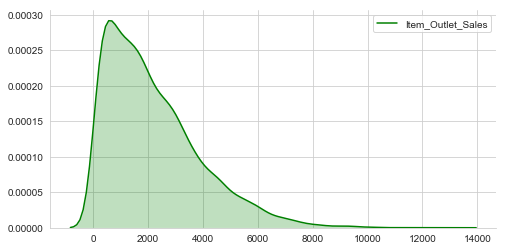

In [20]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df['Item_Outlet_Sales'] , color = 'green', shade = True)
sns.despine()


We note that the maximum product sale is around 13086 and the average number of product sale is 2181

# Correlation Between Variables

#### It will be good to see how the variables are correlated before we jump to bivariate analysis as it will surely help us in further process.

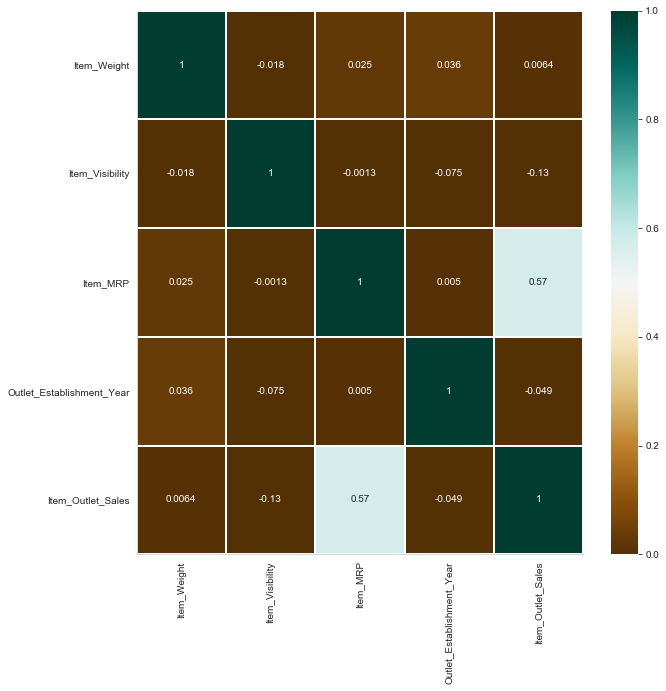

In [21]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True,cmap = 'BrBG',  linewidth=1, linecolor ='white')
sns.despine()

We can see that the Item_Outlet_Sales & Item_MRP have a strong correlation between them which is found to be 0.57

# BIVARIATE ANALYSIS

#### Now let's do some of the Bivariate Analysis on the given dataset

#### Item_MRP - Item_Outlet_Sales

In [22]:
### Summary of data for Item_MRP & Item_Outlet_Sales

df[['Item_MRP', 'Item_Outlet_Sales']].describe()

,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,140.992782,2181.288914
std,62.275067,1706.499616
min,31.290000,33.290000
25%,93.826500,834.247400
50%,143.012800,1794.331000
75%,185.643700,3101.296400
max,266.888400,13086.964800


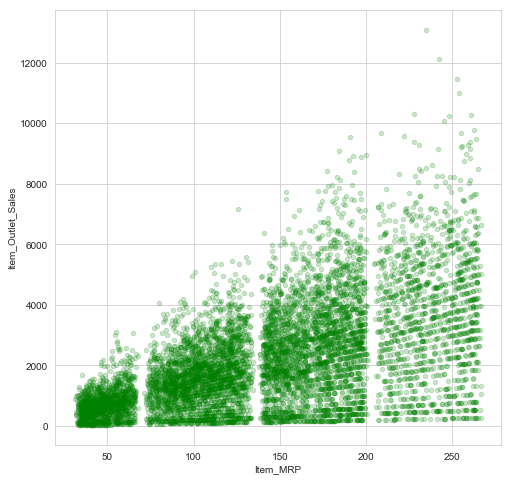

In [30]:
### Scatter PLot
df.plot.scatter(x='Item_MRP', y= 'Item_Outlet_Sales', color= 'green', animated = True, figsize = (8,8), alpha = 0.2)

From the above plot we note that  higher the price of the Item, more is the Item Outlet Sales. 

Customers buy expensive item more than the cheap ones.  

#### Item_Outlet_Sales - Outlet_Size

In [24]:
df[['Item_Outlet_Sales' , 'Outlet_Size']].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


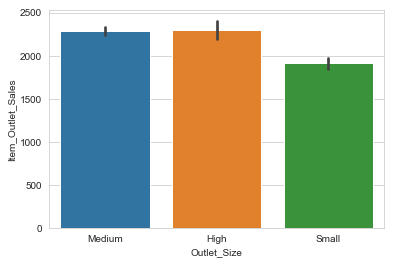

In [25]:
sns.barplot(y= 'Item_Outlet_Sales', x='Outlet_Size', data = df)

From the plot we observe that the Outlet Size affect the Sales Of the Item.
Higher the outlet size, more are the sales.

#### Item_Outlet Sales - Outlet_Type

In [26]:
df[['Item_Outlet_Sales', 'Outlet_Type']].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


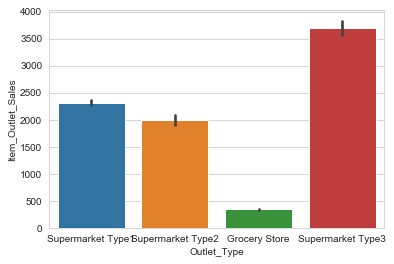

In [27]:
sns.barplot(y= 'Item_Outlet_Sales', x='Outlet_Type', data = df)

From the outlet Type we conclude that **Supermarket Type3** has highest number of sales and the **Grocery Store** has the lowest number of sales

## CONCLUSION

With this dataset we understand the  properties of products and stores which play a key role in increasing sales and use the Information to take the correct measures which could help their business to grow. 
We found that most of the outlet types are supermarket and higher number of sales are in Tier3 cities. We came to know that higher the price of the Items, more the sale of those products. This play a key role in increasing sales and help their business to grow. 